# [Step 1] Import Libraries & Data Files

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating a path
path = r'C:\Users\duongxma\Dropbox\CareerFoundry - Data Analytics\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [3]:
# Import customer_merged_new.pkl, the most updated version of the data file
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merged_new.pkl'))

In [4]:
df.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,last_name,gender,state,age,date_joined,total_dependants,marital_status,income,max_order,loyalty_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,10,New customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,10,New customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,10,New customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,10,New customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,10,New customer


# [Step 2] Data Security Implications

In [4]:
# Drop customer first name and last name  (PII data) so their respective records aren't traced back to them. 

df.drop(columns = ['first_name', 'last_name'])

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,busiest_period_of_day,gender,state,age,date_joined,total_dependants,marital_status,income,max_order,loyalty_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Average orders,Female,Alabama,31,2/17/2019,3,married,40423,10,New customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Average orders,Female,Alabama,31,2/17/2019,3,married,40423,10,New customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Most orders,Female,Alabama,31,2/17/2019,3,married,40423,10,New customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Average orders,Female,Alabama,31,2/17/2019,3,married,40423,10,New customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Most orders,Female,Alabama,31,2/17/2019,3,married,40423,10,New customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,prior,26,4,23,5.0,19675,1,1,...,Fewest orders,Male,Hawaii,25,5/26/2017,0,single,53755,26,Regular customer
32404855,484769,66343,prior,1,6,11,NaN,47210,1,0,...,Most orders,Female,Tennessee,22,9/12/2017,3,married,46151,4,New customer
32404856,1561557,66343,prior,2,1,11,30.0,47210,1,1,...,Most orders,Female,Tennessee,22,9/12/2017,3,married,46151,4,New customer
32404857,276317,66343,prior,3,6,15,19.0,47210,1,1,...,Most orders,Female,Tennessee,22,9/12/2017,3,married,46151,4,New customer


# [Step 3] Customer Spending Behavior by Region (for Instacart Officers)

In [5]:
# Creating empty region column to be filled later on when region criteria is established (below).

region = []

In [6]:
# State column frequencies check to know how many results we should be expecting for each region.

df['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [7]:
# Establishing criteria for 'northeast', 'midwest', 'south', and 'west' regions and filling in region column created above. 

for x in df['state']:
    if x in ['Maine','New Hampshire', 'Vermont', 'Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('northeast')
    elif x in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('midwest')
    elif x in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('south')
    else:
        region.append('west')

In [8]:
# Adding region column to df.

df['region'] = region

In [9]:
# Frequencies on the newly created region column.

df['region'].value_counts(dropna = False)

south        10791885
west          8292913
midwest       7597325
northeast     5722736
Name: region, dtype: int64

In [11]:
# Creating crosstabs (like a pivot table in Excel) with the region and loyalty_flag columns to determine whether there's a 
# difference in spending habits between the different U.S. regions. 

region_loyalty_ct = pd.crosstab(df['region'], df['loyalty_flag'], dropna = False)

In [12]:
# View the newly created crosstab. 

region_loyalty_ct

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
midwest,2373774,1472573,3750978
northeast,1841785,1100207,2780744
south,3405844,2074410,5311631
west,2662690,1596800,4033423


In [13]:
# Copying to clipboard to paste in Excel; see Crosstabs.xlsx file in the 04 Analysis > Reports folder. 

region_spending_ct.to_clipboard()

# [Step 4] Exclude Low-Activity Customers (for Instacart CFO)

In [14]:
# Creating the exclusion flags.

df.loc[df['max_order'] < 5, 'low_order_flag'] = 'Low order customer'

In [15]:
df.loc[df['max_order'] >= 5, 'low_order_flag'] = 'High order customer'

In [16]:
df['low_order_flag'].value_counts(dropna = False)

High order customer    30964564
Low order customer      1440295
Name: low_order_flag, dtype: int64

In [17]:
# Creating a sample df with only the High order customer column. 

df_high = df[df['low_order_flag'] == 'High order customer']

In [18]:
df_high.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,state,age,date_joined,total_dependants,marital_status,income,max_order,loyalty_flag,region,low_order_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Alabama,31,2/17/2019,3,married,40423,10,New customer,south,High order customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,10,New customer,south,High order customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,10,New customer,south,High order customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,10,New customer,south,High order customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,10,New customer,south,High order customer


In [19]:
# Exporting the sample df as high_order_customers.pkl

df_high.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_order_customers.pkl'))

# [Step 5] Customer Profiles (for Marketing & Business Strategy Units)

# Age Group

In [10]:
# Creating the age_flag

age_flag = []
for x in df['age'].tolist():
    if x <= 25:
        age_flag.append('Young')
    elif x > 25 and x < 65:
        age_flag.append('Middle-aged')
    elif x >= 65:
        age_flag.append('Senior')
    else:
        print('Weird value:', x)

In [11]:
# Adding age_flag to df as 'age_profile'

df['age_profile'] = age_flag

In [12]:
# Run frequencies for 'age_profile'

df['age_profile'].value_counts(dropna = False)

Middle-aged    19784586
Senior          8575084
Young           4045189
Name: age_profile, dtype: int64

# Income

In [13]:
# Creating the income_flag

income_flag = []
for x in df['income'].tolist():
    if x < 75000:
        income_flag.append('Low-income')
    elif x >= 75000 and x < 150000:
        income_flag.append('Mid-income')
    elif x >= 150000:
        income_flag.append('High-income')
    else:
        print('Weird value:', row)

In [14]:
# Adding income_flag to df as 'income_profile'

df['income_profile'] = income_flag

In [15]:
# Run frequencies for 'income_profile'

df['income_profile'].value_counts(dropna = False)

Mid-income     17910512
Low-income     10442766
High-income     4051581
Name: income_profile, dtype: int64

# Customer Types Based on Purchases (using department_id column)

In [16]:
df['department_id'].value_counts(dropna = False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

In [17]:
# Creating a crosstab between 'department_id' and 'user_id'

dep_user_ct = pd.crosstab(df['department_id'], df['user_id'], dropna = False)

# Creating Customer Profile: Pet Owner (based on department_id = 8)

In [18]:
# department_id = 8 is the pet department; creating criteria for what customer who have pet(s). 

pet_dict = dict()
for user in dep_user_ct:
    workinglist = dep_user_ct[user].tolist()
    if workinglist[8] == 0:
        pet_dict[user] = 'Not Pet Owner'
    else:
        pet_dict[user] = 'Pet Owner'

In [19]:
# Assigning user flags to the pet_flag

pet_flag = []
for user in df['user_id']:
    pet_flag.append(pet_dict[user])

In [20]:
# Adding pet_flag to df as 'pet_profile'

df['pet_profile'] = pet_flag

In [21]:
# Run frequencies for 'pet_profile'

df['pet_profile'].value_counts(dropna = False)

Pet Owner        26181938
Not Pet Owner     6222921
Name: pet_profile, dtype: int64

# Family Status (Total Dependants Based on Marital Status & Age)

In [22]:
# Frequencies on marital_status column to see the breakdown of the customer marital statuses.

df['marital_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: marital_status, dtype: int64

In [23]:
# Frequencies on total_dependants column to see how many dependants customers have. 

df['total_dependants'].value_counts(dropna = False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: total_dependants, dtype: int64

In [34]:
# Crosstab between total_dependants and martial status to see how these two fields relate to one another. 

marital_dependants_ct = pd.crosstab(df['total_dependants'], df['marital_status'], dropna = False)

In [35]:
marital_dependants_ct

marital_status,divorced/widowed,living with parents and siblings,married,single
total_dependants,,,,
0,2771812,0,0,5325691
1,0,530200,7550904,0
2,0,507963,7583180,0
3,0,512440,7622669,0


In [36]:
# Crosstab between total_dependants and age_profile to see how these two fields relate to one another. For example, if the 
# age_profile is 'Young' and the total_dependents is more than 0, we may categorize this customer as a 'Young Parent'. On the
# flip side, if the total_dependants is 0, we may categorize this customer as a 'Single Adult'.

age_dependants_ct = pd.crosstab(df['total_dependants'], df['age_profile'], dropna = False)

In [37]:
age_dependants_ct

age_profile,Middle-aged,Senior,Young
total_dependants,,,
0,4979870,2120084,997549
1,4926532,2123723,1030849
2,4910367,2187014,993762
3,4967817,2144263,1023029


In [24]:
# Creating criteria for customers who are single with no dependants. 

df.loc[(df['total_dependants'] == 0) & (df['marital_status'] != 'married'), 'dependant_profile'] = 'Single No Dependants'

In [25]:
# Creating criteria for customers who are married with no dependants. 

df.loc[(df['total_dependants'] == 0) & (df['marital_status'] == 'married'), 'dependant_profile'] = 'Married No Dependants'

In [26]:
# Creating criteria for customers who are single with dependants. 

df.loc[(df['total_dependants'] != 0) & (df['marital_status'] != 'married'), 'dependant_profile'] = 'Single with Dependants'

In [27]:
# Creating criteria for customers who are married with dependants. 

df.loc[(df['total_dependants'] != 0) & (df['marital_status'] == 'married'), 'dependant_profile'] = 'Married with Dependants'

In [28]:
df['dependant_profile'].value_counts(dropna = False)

Married with Dependants    22756753
Single No Dependants        8097503
Single with Dependants      1550603
Name: dependant_profile, dtype: int64

In [29]:
# Creating criteria for customers who are not a parent (no dependants).  

df.loc[(df['total_dependants'] == 0), 'parent_profile'] = 'Not a Parent'

In [30]:
# Creating criteria for customers who are young parents. 

df.loc[(df['age_profile'] == 'Young') & (df['total_dependants'] >= 1), 'parent_profile'] = 'Young Parent'

In [31]:
# Creating criteria for customers who are middle-aged parents. 

df.loc[(df['age_profile'] == 'Middle-aged') & (df['total_dependants'] >= 1), 'parent_profile'] = 'Middle-aged Parent'

In [32]:
# Creating criteria for customers who are old (senior) parents. 

df.loc[(df['age_profile'] == 'Senior') & (df['total_dependants'] >= 1), 'parent_profile'] = 'Senior Parent'

In [33]:
df['parent_profile'].value_counts(dropna = False)

Middle-aged Parent    14804716
Not a Parent           8097503
Senior Parent          6455000
Young Parent           3047640
Name: parent_profile, dtype: int64

# [Step 6] Visualization of the Above Customer Profiles

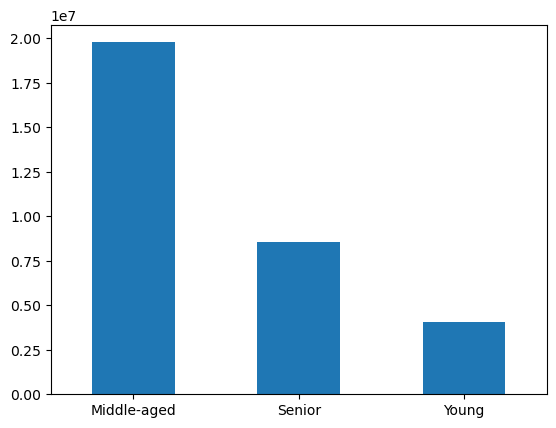

In [48]:
# Creating a bar chart for age profile.

bar_age_profile = df['age_profile'].value_counts().plot.bar(rot=0)

In [49]:
# Exporting the age profile bar chart to the Visualizations folder.

bar_age_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

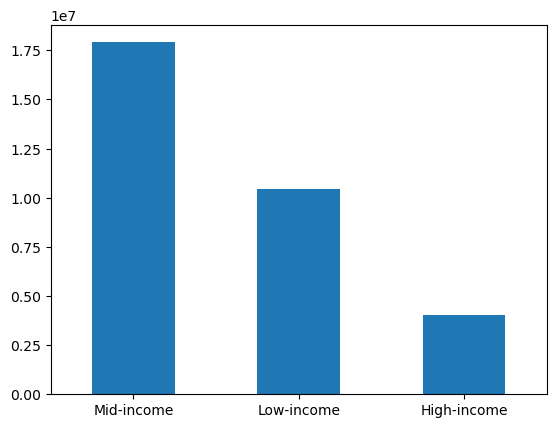

In [50]:
# Creating a bar chart for income profile.

bar_income_profile = df['income_profile'].value_counts().plot.bar(rot=0)

In [51]:
# Exporting the income profile bar chart to the Visualizations folder.

bar_income_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

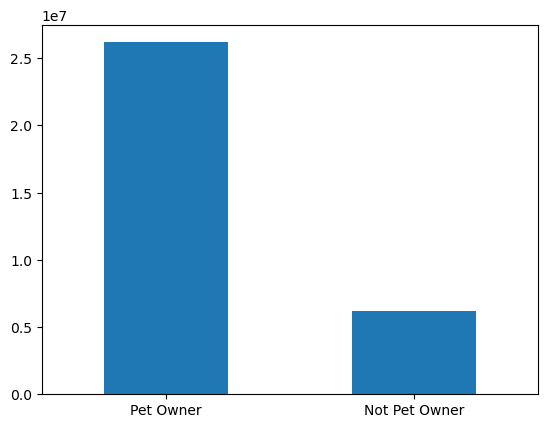

In [52]:
# Creating a bar chart for pet profile.

bar_pet_profile = df['pet_profile'].value_counts().plot.bar(rot=0)

In [53]:
# Exporting the pet profile bar chart to the Visualizations folder.

bar_pet_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_profile_bar.png'))

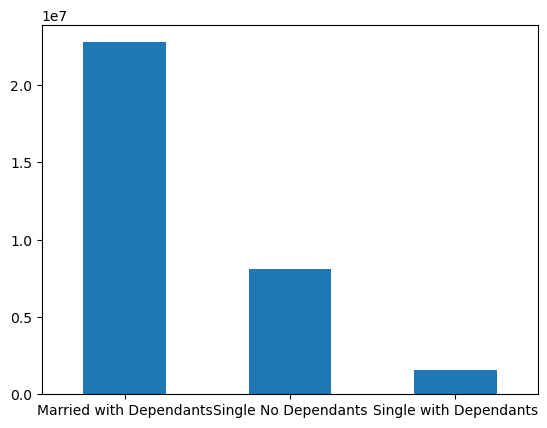

In [54]:
# Creating a bar chart for dependant profile.

bar_dependant_profile = df['dependant_profile'].value_counts().plot.bar(rot=0)

In [55]:
# Exporting the dependant profile bar chart to the Visualizations folder.

bar_dependant_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependant_profile_bar.png'))

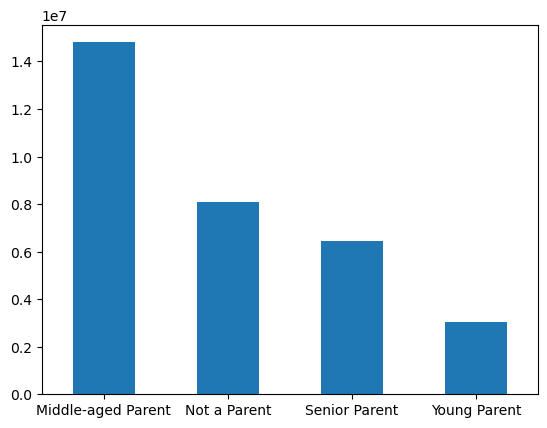

In [56]:
# Creating a bar chart for parent profile.

bar_parent_profile = df['parent_profile'].value_counts().plot.bar(rot=0)

In [57]:
# Exporting the parent profile bar chart to the Visualizations folder.

bar_parent_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_profile_bar.png'))

# [Step 7] Aggregating Max, Mean, and Min Variables for Customer Profiles

In this section, we are examining how much customers in the different profiles established above spend.

In [58]:
# age_profile descriptive statistics

df.groupby('age_profile').agg({'days_since_last_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_last_order               prices           
                             mean   max  min      mean   max  min
age_profile                                                      
Middle-aged             11.117362  30.0  0.0  7.789660  25.0  1.0
Senior                  11.078641  30.0  0.0  7.796546  25.0  1.0
Young                   11.093030  30.0  0.0  7.785748  25.0  1.0

In [59]:
# income_profile descriptive statistics

df.groupby('income_profile').agg({'days_since_last_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_last_order               prices           
                                mean   max  min      mean   max  min
income_profile                                                      
High-income                10.941393  30.0  0.0  7.946928  25.0  1.0
Low-income                 11.240514  30.0  0.0  7.434729  25.0  1.0
Mid-income                 11.061703  30.0  0.0  7.963487  25.0  1.0

In [60]:
# pet_profile descriptive statistics

df.groupby('pet_profile').agg({'days_since_last_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_last_order               prices           
                               mean   max  min      mean   max  min
pet_profile                                                        
Not Pet Owner             12.328069  30.0  0.0  7.565084  25.0  1.0
Pet Owner                 10.823466  30.0  0.0  7.844687  25.0  1.0

In [ ]:
# dependant_profile descriptive statistics

df.groupby('dependant_profile').agg({'days_since_last_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

In [ ]:
# parent_profile descriptive statistics

df.groupby('parent_profile').agg({'days_since_last_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

# [Step 8] Comparing Customer Profiles to Regions & Departments

In [34]:
# Comparing age_profile to region to see the different age groups across the different US regions. 

age_region_ct = pd.crosstab(df['region'], df['age_profile'], dropna = False)

In [35]:
age_region_ct

age_profile,Middle-aged,Senior,Young
region,,,
midwest,4666947,1990844,939534
northeast,3457721,1553903,711112
south,6578963,2836257,1376665
west,5080955,2194080,1017878


In [36]:
# Comparing income_profile to region to see the different customer income across the different US regions. 

income_region_ct = pd.crosstab(df['region'], df['income_profile'], dropna = False)

In [37]:
income_region_ct

income_profile,High-income,Low-income,Mid-income
region,,,
midwest,955948,2427882,4213495
northeast,706788,1822149,3193799
south,1342212,3492975,5956698
west,1046633,2699760,4546520


In [38]:
# Comparing pet_profile to region to see which US region has pet and not. 

pet_region_ct = pd.crosstab(df['region'], df['pet_profile'], dropna = False)

In [39]:
pet_region_ct

pet_profile,Not Pet Owner,Pet Owner
region,,
midwest,1464225,6133100
northeast,1103851,4618885
south,2074143,8717742
west,1580702,6712211


In [40]:
# Comparing dependant_profile to region to see the different customers with dependants and their marital status across the 
# different US regions. 

dependants_region_ct = pd.crosstab(df['region'], df['dependant_profile'], dropna = False)

In [41]:
dependants_region_ct

dependant_profile,Married with Dependants,Single No Dependants,Single with Dependants
region,,,
midwest,5325608,1905200,366517
northeast,4036321,1418301,268114
south,7560642,2701659,529584
west,5834182,2072343,386388


In [42]:
# Comparing parent_profile to region to see the different customers with dependants and their age across the different US 
# regions. 

parent_region_ct = pd.crosstab(df['region'], df['parent_profile'], dropna = False)

In [43]:
parent_region_ct

parent_profile,Middle-aged Parent,Not a Parent,Senior Parent,Young Parent
region,,,,
midwest,3477957,1905200,1498082,716086
northeast,2615125,1418301,1158056,531254
south,4917325,2701659,2145202,1027699
west,3794309,2072343,1653660,772601


In [44]:
# Comparing age_profile to department_id to see the different age groups and which department they frequent. 

age_department_ct = pd.crosstab(df['department_id'], df['age_profile'], dropna = False)

In [45]:
age_department_ct

age_profile,Middle-aged,Senior,Young
department_id,,,
1,1361099,593669,279975
2,22199,9425,4667
3,716480,309522,146426
4,5787924,2513763,1177604
5,94249,39036,20411
6,164442,70774,34037
7,1640204,714832,333087
8,58135,26286,13295
9,527883,228935,109809


In [46]:
# Comparing income_profile to department_id to see the different income groups and which department they frequent. 

income_department_ct = pd.crosstab(df['department_id'], df['income_profile'], dropna = False)

In [47]:
income_department_ct

income_profile,High-income,Low-income,Mid-income
department_id,,,
1,288385,702058,1244300
2,4749,11635,19907
3,154054,360332,658042
4,1179477,2919489,5380325
5,24953,48180,80563
6,34285,81032,153936
7,325147,958035,1404941
8,13514,29707,54495
9,111263,255515,499849


In [48]:
# Comparing income_profile to department_id to see the different income groups and which department they frequent. 

income_department_ct = pd.crosstab(df['department_id'], df['income_profile'], dropna = False)

In [49]:
income_department_ct

income_profile,High-income,Low-income,Mid-income
department_id,,,
1,288385,702058,1244300
2,4749,11635,19907
3,154054,360332,658042
4,1179477,2919489,5380325
5,24953,48180,80563
6,34285,81032,153936
7,325147,958035,1404941
8,13514,29707,54495
9,111263,255515,499849


In [50]:
# Comparing dependant_profile to department_id to see the different dependant groups and which department they frequent. 

dependant_department_ct = pd.crosstab(df['department_id'], df['dependant_profile'], dropna = False)

In [51]:
dependant_department_ct

dependant_profile,Married with Dependants,Single No Dependants,Single with Dependants
department_id,,,
1,1569050,557160,108533
2,25205,9175,1911
3,821881,294405,56142
4,6654218,2375445,449628
5,105682,39118,8896
6,188466,67713,13074
7,1889052,674442,124629
8,67513,24583,5620
9,609663,215262,41702


In [52]:
# Comparing parent_profile to department_id to see the different parent groups and which department they frequent. 

parent_department_ct = pd.crosstab(df['department_id'], df['parent_profile'], dropna = False)

In [53]:
parent_department_ct

parent_profile,Middle-aged Parent,Not a Parent,Senior Parent,Young Parent
department_id,,,,
1,1019278,557160,445336,212969
2,16443,9175,7134,3539
3,534121,294405,233501,110401
4,4329455,2375445,1890738,883653
5,69714,39118,29272,15592
6,122812,67713,53280,25448
7,1226048,674442,538405,249228
8,43782,24583,19262,10089
9,395757,215262,172632,82976


# [Step 9] Visualizations for the Above Comparisons to Region & Department

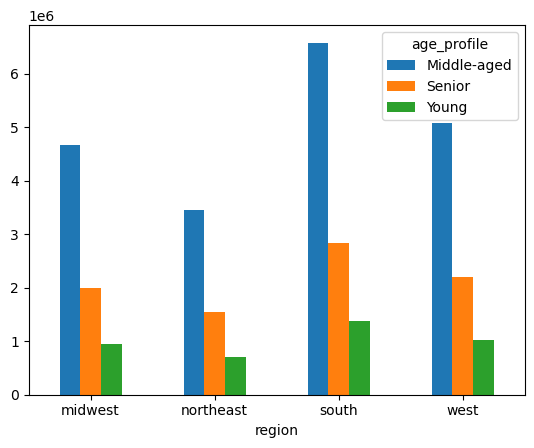

In [54]:
# Creating a bar chart for age profile and region.

bar_age_region = age_region_ct.plot.bar(rot=0)

In [55]:
# Exporting the age profile and region bar chart to the Visualizations folder.

bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

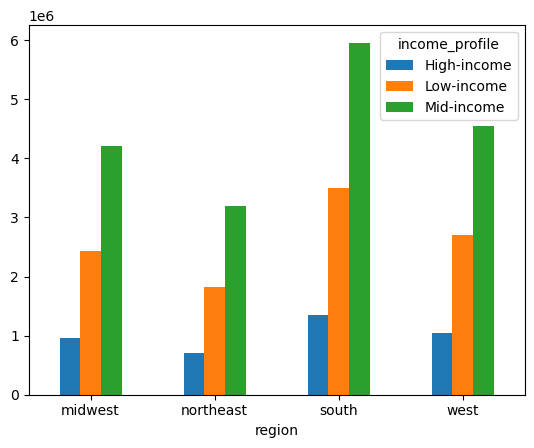

In [56]:
# Creating a bar chart for income profile and region.

bar_income_region = income_region_ct.plot.bar(rot=0)

In [57]:
# Exporting the income profile and region bar chart to the Visualizations folder.

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

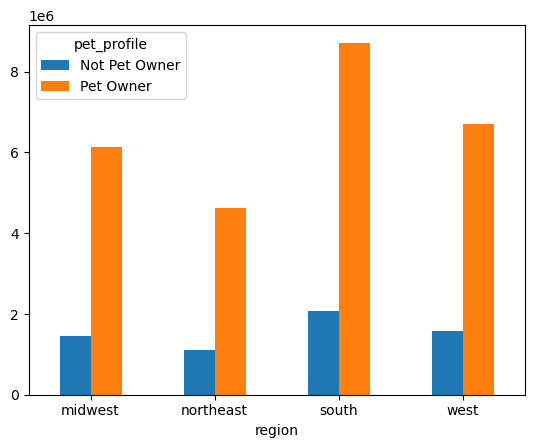

In [58]:
# Creating a bar chart for pet profile and region.

bar_pet_region = pet_region_ct.plot.bar(rot=0)

In [59]:
# Exporting the pet profile and region bar chart to the Visualizations folder.

bar_pet_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_region_bar.png'))

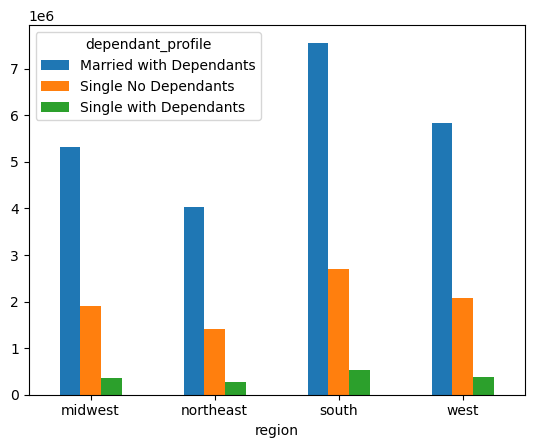

In [60]:
# Creating a bar chart for dependant profile and region.

bar_dependants_region = dependants_region_ct.plot.bar(rot=0)

In [61]:
# Exporting the dependant profile and region bar chart to the Visualizations folder.

bar_dependants_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependant_region_bar.png'))

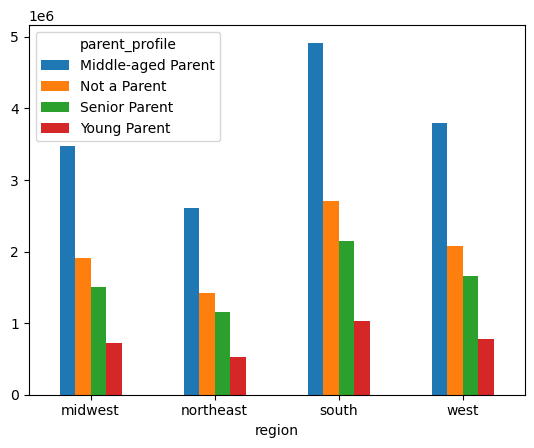

In [62]:
# Creating a bar chart for parent profile and region.

bar_parent_region = parent_region_ct.plot.bar(rot=0)

In [63]:
# Exporting the parent profile and region bar chart to the Visualizations folder.

bar_parent_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_region_bar.png'))

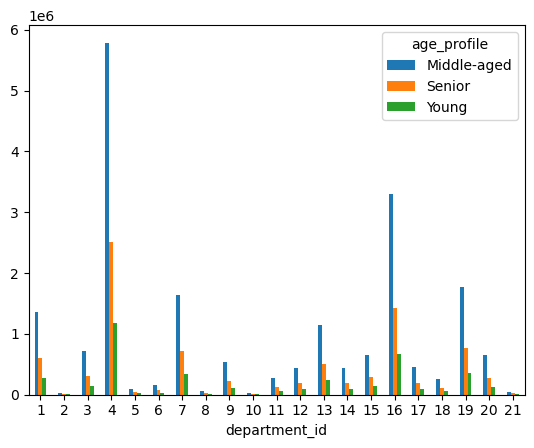

In [64]:
# Creating a bar chart for age profile and department_id.

bar_age_department = age_department_ct.plot.bar(rot=0)

In [65]:
# Exporting the age profile and department_id bar chart to the Visualizations folder.

bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department_bar.png'))

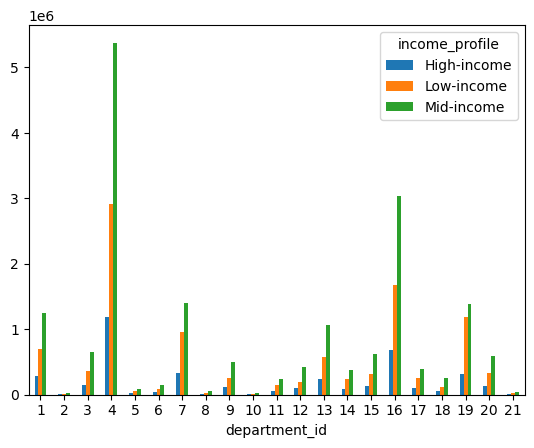

In [66]:
# Creating a bar chart for income profile and department_id.

bar_income_department = income_department_ct.plot.bar(rot=0)

In [67]:
# Exporting the income profile and department_id bar chart to the Visualizations folder.

bar_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_department_bar.png'))

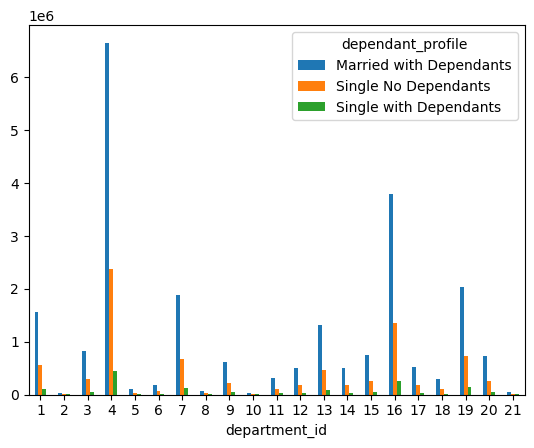

In [68]:
# Creating a bar chart for dependant profile and department_id.

bar_dependant_department = dependant_department_ct.plot.bar(rot=0)

In [69]:
# Exporting the dependant profile and department_id bar chart to the Visualizations folder.

bar_dependant_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependant_department_bar.png'))

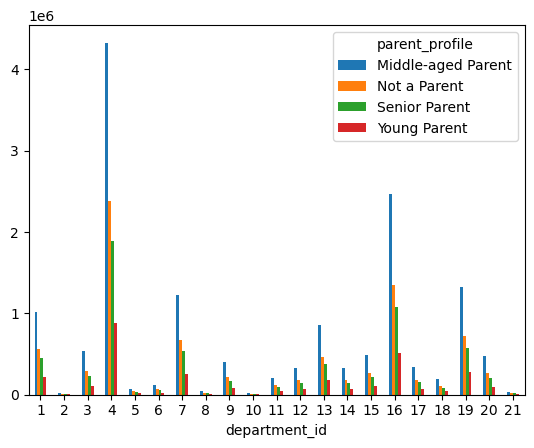

In [70]:
# Creating a bar chart for parent profile and department_id.

bar_parent_department = parent_department_ct.plot.bar(rot=0)

In [71]:
# Exporting the parent profile and department_id bar chart to the Visualizations folder.

bar_parent_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_department_bar.png'))

# [Step 10] Export Final Data Set

In [72]:
# Exporting final data set

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataset.pkl'))